In [1]:
import sys
sys.path.append('../Utils/')
sys.path.append('../Output/tests/')

import csv
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from datetime import date
import re
#import quandl   
# Necessary for obtaining financial data easily
import datetime as dt

from IOUtils_v1 import *
from Strategy import *
from MAStrategy import *
from Backtesting import *

In [2]:
if __name__ == "__main__":
    data_dir = '../Output/tests/'
    data = pd.read_csv(data_dir + 'ag_1712_5min.csv')
    slm = pd.read_csv(data_dir + 'ag_5min_freq.csv')[['prior', 'max']]
    slm = slm.rename(columns={'max': 'signal'})
    signals = SLMStrategy(data, slm, 5).generatingsignal()
    signals['match'] = signals.apply(lambda row: 1 if row['signal'] == row['Direction'] else 0, axis=1)
    #print(signals['match'].describe())
    signals.to_csv(data_dir + 'ag_5min_signal.csv', index=False)

In [3]:
    #tca: trading cost to be applied
    test = vectorizedbacktest(signals, tca = 'None')
    test.runtest()
    test.calperformance()
    test.performance


../Utils\Backtesting.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
../Utils\Backtesting.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


{'Annualized Volatility': 0.124872952609284,
 'Average Daily Return': 0.005531918092841056,
 'Average Negative Return': -0.0010333623970168956,
 'Average Positive Return': 0.0013974276374170659,
 'Average Return per Trade': 0.00033238992832521373,
 'Largest Losing Trade': -0.0057831486480913455,
 'Largest Winning Trade': 0.017552864117196344,
 'Max Drawdown': -0.0064652246203705799,
 'Profit Factor': 1.3523112912286643,
 'Sharpe Ratio': 11.075092678696242,
 'Total Number of Trades': 233,
 'Total Return': 1.0774468532997747,
 'Winning Rate': 0.36480686695278969}

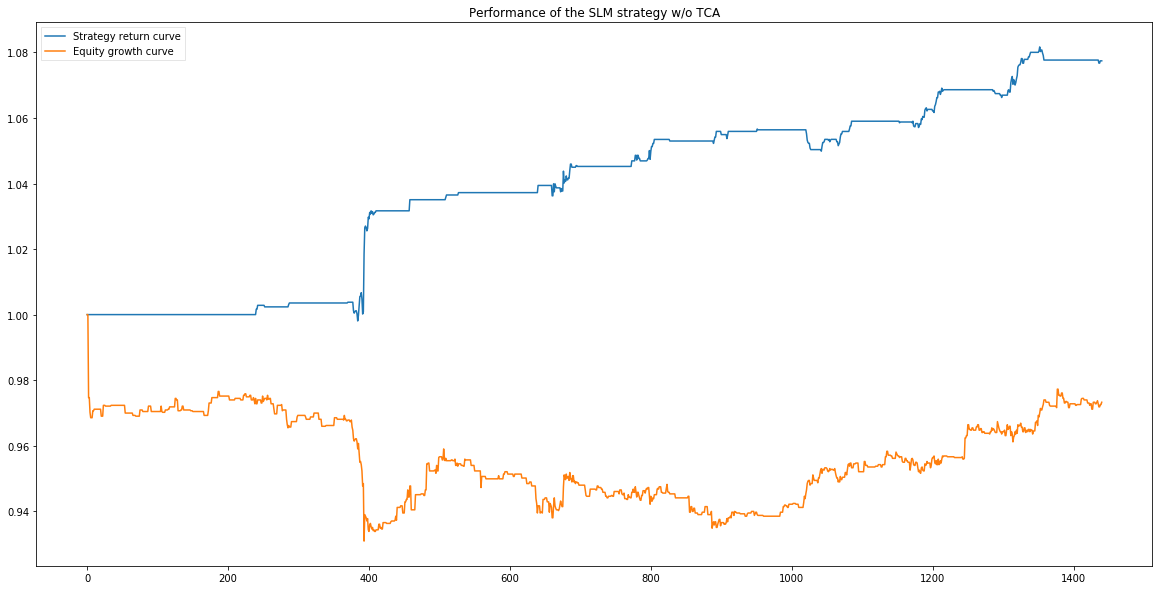

In [4]:
plt.figure(figsize=(20,10))
plt.plot(test.result['equitycurve'], label = "Strategy return curve")
plt.plot(test.result['benchmark'], label = 'Equity growth curve')
plt.title('Performance of the SLM strategy w/o TCA')
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()


In [5]:
    #tca: trading cost to be applied
    test = vectorizedbacktest(signals, tca = 'Fixed')
    test.runtest()
    test.calperformance()
    test.performance
    
    

../Utils\Backtesting.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
../Utils\Backtesting.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


{'Annualized Volatility': 0.10729051001273313,
 'Average Daily Return': 0.0031404895214124863,
 'Average Negative Return': -0.0006957725144378824,
 'Average Positive Return': 0.0012743788055593972,
 'Average Return per Trade': 0.0001886989412007501,
 'Largest Losing Trade': -0.0061431486480913455,
 'Largest Winning Trade': 0.017432864117196346,
 'Max Drawdown': -0.0090324220033826119,
 'Profit Factor': 1.8316026849508038,
 'Sharpe Ratio': 7.317724375249442,
 'Total Number of Trades': 233,
 'Total Return': 1.0439668532997748,
 'Winning Rate': 0.35193133047210301}

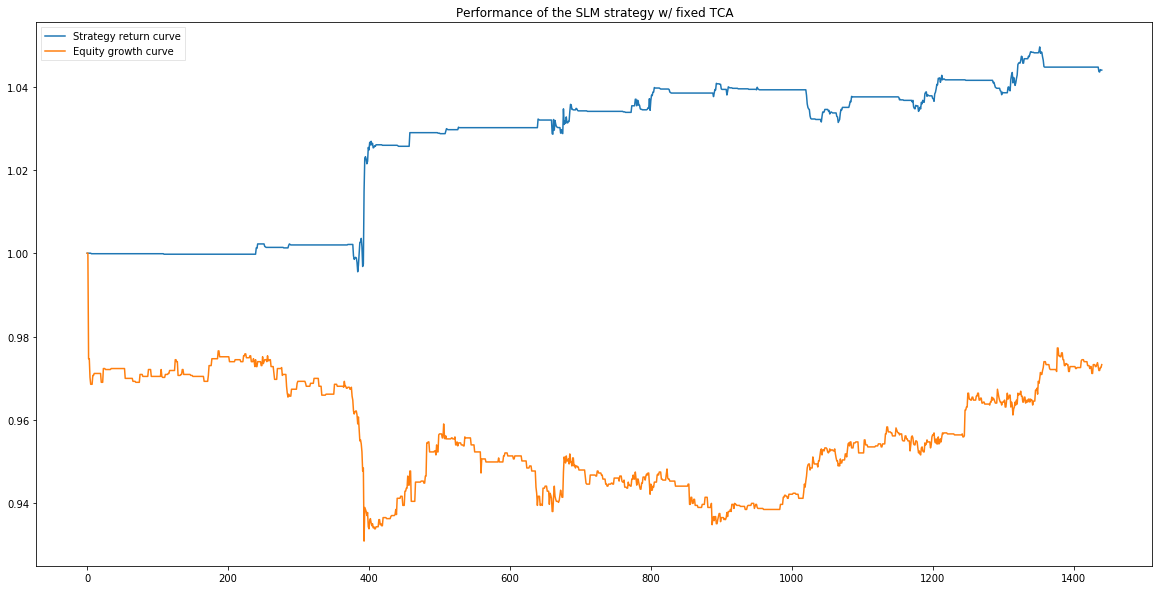

In [6]:
plt.figure(figsize=(20,10))
plt.plot(test.result['equitycurve'], label = "Strategy return curve")
plt.plot(test.result['benchmark'], label = 'Equity growth curve')
plt.title('Performance of the SLM strategy w/ fixed TCA')
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()


In [8]:
#tca: trading cost to be applied
test = vectorizedbacktest(signals, tca = 'Spread')
test.runtest()
test.calperformance()
test.performance

../Utils\Backtesting.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
../Utils\Backtesting.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


{'Annualized Volatility': 0.07906999913793555,
 'Average Daily Return': -0.00760549750477319,
 'Average Negative Return': -0.0014168174276664141,
 'Average Positive Return': 0.001045500724348388,
 'Average Return per Trade': -0.000456982682690235,
 'Largest Losing Trade': -0.0081999579352366007,
 'Largest Winning Trade': 0.0086556153369760878,
 'Max Drawdown': -0.10647696506682469,
 'Profit Factor': 0.7379219819948095,
 'Sharpe Ratio': -24.046723117783262,
 'Total Number of Trades': 233,
 'Total Return': 0.89352303493317531,
 'Winning Rate': 0.23175965665236051}

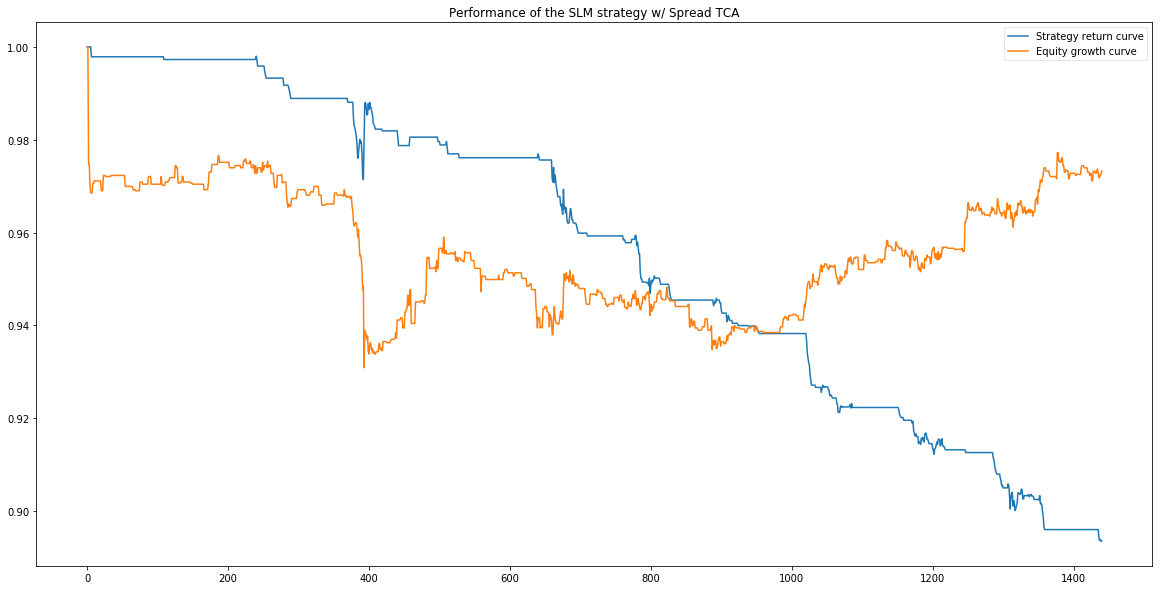

In [10]:
plt.figure(figsize=(20,10))
plt.plot(test.result['equitycurve'], label = "Strategy return curve")
plt.plot(test.result['benchmark'], label = 'Equity growth curve')
plt.title('Performance of the SLM strategy w/ Spread TCA')
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

In [11]:
#tca: trading cost to be applied
test = vectorizedbacktest(signals, tca = 'Compound')
test.runtest()
test.calperformance()
test.performance

../Utils\Backtesting.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['return'][0] = 0.0
../Utils\Backtesting.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


{'Annualized Volatility': 0.10421266217384445,
 'Average Daily Return': -0.009996926076201762,
 'Average Negative Return': -0.0015974057439886288,
 'Average Positive Return': 0.0009517041710555583,
 'Average Return per Trade': -0.0006006736698146981,
 'Largest Losing Trade': -0.0085599579352366,
 'Largest Winning Trade': 0.0085356153369760875,
 'Max Drawdown': -0.13995696506682465,
 'Profit Factor': 0.5957811123673618,
 'Sharpe Ratio': -23.98203315141587,
 'Total Number of Trades': 233,
 'Total Return': 0.86004303493317535,
 'Winning Rate': 0.21888412017167383}

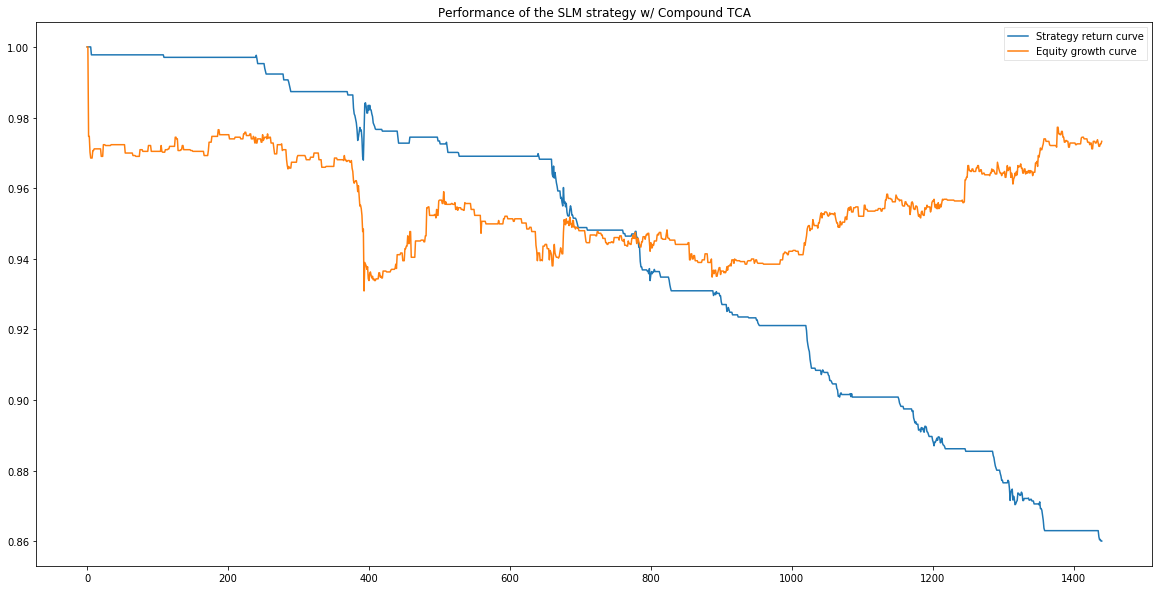

In [12]:
plt.figure(figsize=(20,10))
plt.plot(test.result['equitycurve'], label = "Strategy return curve")
plt.plot(test.result['benchmark'], label = 'Equity growth curve')
plt.title('Performance of the SLM strategy w/ Compound TCA')
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
leg.get_frame().set_alpha(0.5)
plt.show()

In [17]:
# Optimization
shortls = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 55]
longls = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
 
# init return benchmark and results file format
benchmark = 0.
column_names = ['Total Return', 'Annualized Volatility', 'Sharpe Ratio', 'Max Drawdown', 
            'Winning Rate', 'Profit Factor', 'Average Return per Trade', 'Average Positive Return', 
                'Average Negative Return', 'Largest Winning Trade', 'Largest Losing Trade', 'Total Number of Trades']
 
with open('./Output/results.csv','w') as f:
    w = csv.writer(f)
    w.writerow(['short window', 'long window'] + column_names)
 
for i in shortls:
    for j in longls:
        j
        if i + 1 >= j: #trying to hold the position for at least a minute here
            pass
        else:
            strategy_params = {'short_window': i, 'long_window': j}
            test = vectorizedbacktest(data, movingaveragestrategy, strategy_params)
            test.runtest()
            test.calperformance()
            # record backtest result
            with open('./Output/results.csv','a') as f:
                w = csv.writer(f)
                w.writerow([i, j] + [test.performance[key] for key in column_names])
 
            if test.performance['Total Return'] > benchmark:
                optimized = [i, j]
                benchmark = test.performance['Total Return']

In [21]:
print('optimized short-long pair:{0}, optimized performance:{1}'.format(optimized, benchmark))

optimized short-long pair:[1, 3], optimized performance:22.20227693430333


In [ ]:
"""
    test paper strategy for SHA index
    """
    sha_data = pd.read_csv(data_dir + 'sha000001.csv')
    sha_data['Date'] = pd.to_datetime(sha_data['Date'], format="%m/%d/%Y")
    sha_data = sha_data[(sha_data['Date'] >= '2005-01-04') & (sha_data['Date'] <= '2013-12-31')]
    sha_data = sha_data.sort_values(by=['Date'])
    sha_strategy = pd.read_csv(data_dir + 'sha_strategy_6.csv')
    sha_signals = SLMStrategy(sha_data, sha_strategy, 5, price='ClosePrice').generatingsignal()
    sha_signals['change_pct'] = sha_signals['change_pct'].astype(float)
    sha_signals['strategy'] = sha_signals.apply(lambda row: row['change_pct'] if row['signal']==2 else (-1*row['change_pct'] if row['signal']==1 else 0), axis=1)
    sha_signals['cum_gain'] = sha_signals['strategy'].cumsum()
    sha_signals.to_csv(data_dir + 'sha_strategy_gain.csv')
    fig, ax1 = plt.subplots()
    ax1.plot(sha_signals['ClosePrice'])
    ax2 = ax1.twinx()
    ax2.plot(sha_signals['cum_gain'], color='red')
    fig.tight_layout()
    plt.show()